In [10]:
# Loading Libraries:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Load the credit card transactions dataset
df = pd.read_csv('creditcard.csv')

# Display the number of rows and columns
print(f"Dataset loaded successfully with {df.shape[0]:,} rows and {df.shape[1]} columns.")

Dataset loaded successfully with 284,807 rows and 31 columns.


In [3]:
# Preview the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


### Insights_Observations

- Features V1 to V28 are PCA-transformed, so they’re already scaled.

- Time and Amount are raw and may need scaling.

- Class column is not shown here yet (we'll check it next) — it indicates if a transaction is fraudulent (1) or legitimate (0).

In [4]:
# Summary of dataset structure, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Insights_Observations

- No missing values — all 284,807 rows are complete.

- All features are float64 except for Class which is int64.

- This means:

    - We don’t need imputation.

    - We can go directly to EDA and scaling for model training.

    - We’ll focus on detecting fraudulent cases (Class = 1).

In [5]:
# Check distribution of fraud vs. non-fraud transactions
class_counts = df['Class'].value_counts()

print("Class distribution:")
print(class_counts)
print("\nPercentage of fraud transactions: {:.6f}%".format((class_counts[1] / class_counts.sum()) * 100))

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraud transactions: 0.172749%


### Inferences_Observations:

- Legitimate transactions (Class = 0): 284,315

- Fraudulent transactions (Class = 1): 492

- Fraud Percentage: Approximately 0.17%

This confirms a highly imbalanced dataset, which is common in real-world fraud detection scenarios. We'll take this into account when choosing evaluation metrics later.

C:\Users\Dragon\AppData\Local\Temp\ipykernel_13564\1195810326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


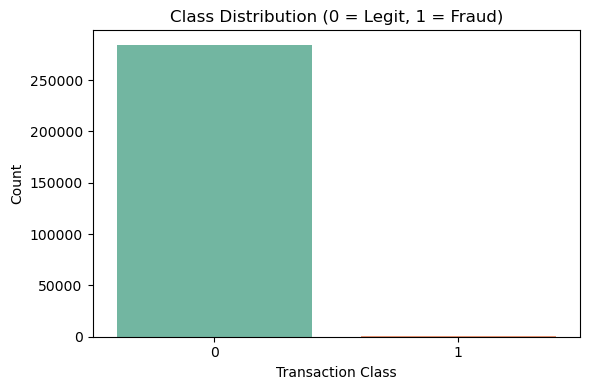

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Inferences_Observations:

The bar plot clearly shows a strong imbalance between the two classes:

- The vast majority of transactions are legitimate.

- Only a tiny portion of the dataset represents fraud cases.

This imbalance is a common trait in fraud detection scenarios and will influence our approach to model evaluation. Since accuracy alone would be misleading, we’ll later focus on precision, recall, and F1-score to assess our models.

In [7]:
# Display descriptive statistics for each feature
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


### Insights_Observations:

1. PCA-transformed Features (V1–V28):
These features have already been scaled through Principal Component Analysis. Their means are close to zero, and most of them range between roughly -30 and +30, indicating standardized values.

2. Amount Column:

    - Mean: 88.35

    - Min: 0.00

    - Max: 25,691.16

This feature is not normalized and varies significantly. We'll apply scaling later to bring it into the same range as other features.

3. Time Column:

    - Ranges from 0 to 172,792 seconds (about 2 days)

    - Represents the time elapsed from the first transaction

This column may or may not be useful depending on its predictive power. We'll explore its effect later but will prepare it for modeling by scaling it too.

4. Class Column:

    - Binary target variable (0 for legitimate, 1 for fraud).

    - Already in usable form — no encoding or transformation needed.

In [8]:
# Calculate correlation of all features with the target class
correlation = df.corr(numeric_only=True)['Class'].sort_values(ascending=False)

# Display top 10 features most positively/negatively correlated with fraud
correlation.head(10)

Class   1.000
V11     0.155
V4      0.133
V2      0.091
V21     0.040
V19     0.035
V20     0.020
V8      0.020
V27     0.018
V28     0.010
Name: Class, dtype: float64

### Inferences_Observations:

1. Most Correlated Feature:

    - V11 has the highest positive correlation with Class at 0.155, suggesting it has some predictive power for fraud detection.

2. Other Notable Features:

    - V4 (0.133), V2 (0.091), and V21 (0.040) show lower, yet still useful, positive correlation.

    - Remaining features like V19, V8, V20, V27, and V28 have very low correlations (< 0.03), but in unsupervised settings, even small signals might be helpful.

3. Low Absolute Correlations Overall:

    - No feature has strong linear correlation with fraud.

    - This supports our approach to use unsupervised models that can capture non-linear patterns, such as Isolation Forests and Autoencoders.

In [11]:
# Create a copy of the dataset to avoid modifying original
df_scaled = df.copy()

# Apply Standard Scaling to 'Time' and 'Amount'
scaler = StandardScaler()
df_scaled[['Time', 'Amount']] = scaler.fit_transform(df_scaled[['Time', 'Amount']])

# Display first few rows to confirm changes
df_scaled[['Time', 'Amount']].head()

,Time,Amount
0,-1.997,0.245
1,-1.997,-0.342
2,-1.997,1.161
3,-1.997,0.141
4,-1.997,-0.073


### Inferences_Observations:

1. Purpose of Scaling:

    - The Time and Amount columns were the only features not transformed by PCA in the original dataset.

    - Scaling ensures these two features are brought onto the same scale as the others, which helps models that rely on distance calculations (like Isolation Forests) perform better.

2. StandardScaler Output:

    - Both columns now have values centered around zero, with most values falling roughly between -2 and +2.

    - This confirms that the transformation has standardized the data as expected.

3. Data Integrity Maintained:

    - A copy of the original dataset was created before scaling, so the original data remains untouched.

    - This allows us to revert or compare back if needed without data loss.

In [12]:
# Separate features and labels
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Confirm the shapes of feature matrix and label vector
print(f"Feature matrix shape: {X.shape}")
print(f"Label vector shape: {y.shape}")

Feature matrix shape: (284807, 30)
Label vector shape: (284807,)
